In [1]:
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
def AnalyseGEN(plot_name, files, expected_results, iterations=10,
               populationSize=10, mutationProbability = 0.05, crossesPerGeneration=50,
                drawPlot = True):
    # SYMULOWANE WYŻARZANIE
    actual_results = []
    error = []
    
    index = 0
    for f in files:
        print("starting", f)
        
        p1 = subprocess.Popen(
            ["../Debug/PEA_Projekt.exe",
             "GEN",
             "../Debug/Data/"+f+".txt",
             str(iterations),
             str(populationSize),
             str(mutationProbability),
             str(crossesPerGeneration),
             str(0)],
            stdout=subprocess.PIPE)
        
        text_result = p1.communicate()[0].strip()
        print(text_result)
        single_result = float(text_result)
        actual_results.append(single_result)
        
        index+=1
        
    errors = [(abs(expected_results[x] - actual_results[x])) / expected_results[x] * 100
                   for x in range(len(actual_results))]
    
    avgError = sum(errors) / len(errors)
    
    resultTable = pd.DataFrame(
        {'baseFile' : files,
         'actual_results': actual_results,
         'expected_results': expected_results,
         'error': errors
        })
    
    if drawPlot:
        plt.rcParams['figure.figsize'] = [20, 5]
        fig, axes = plt.subplots()

        ind = np.arange(len(expected_results))
        width = 0.4   

        plt.bar(ind, expected_results, width, label='Wartosci globalnie minimalne')
        plt.bar(ind + width, actual_results, width,
            label='Wartosci obliczone przez algorytm')

        plt.ylabel('Wagi scieżek')
        plt.title(plot_name)

        plt.xticks(ind + width / 2, files)
        plt.legend(loc='best')

        plt.show()
    
    print(avgError)
    
    return (resultTable, avgError)

In [3]:
files = ["TSP/data17", "TSP/data21", "TSP/data24", "TSP/data26", "TSP/data29", "TSP/data42", "TSP/data58", "TSP/data120"]
expected_results = [2085, 2707, 1272, 937, 1610, 699, 25395, 6942]

iterations_of_dependency_check = 15

starting TSP/data26
b'1212'
29.34898612593383
starting TSP/data26
b'1139'
21.558164354322304
starting TSP/data26
b'1209'
29.02881536819637
starting TSP/data26
b'1006'
7.363927427961579
starting TSP/data26
b'1152'
22.94557097118463
starting TSP/data26
b'1083'
15.581643543223054
starting TSP/data26
b'1017'
8.537886872998932
starting TSP/data26
b'1023'
9.178228388473853
starting TSP/data26
b'1015'
8.32443970117396
starting TSP/data26
b'967'
3.2017075773745995
starting TSP/data26
b'974'
3.9487726787620065
starting TSP/data26
b'1006'
7.363927427961579
starting TSP/data26
b'1051'
12.16648879402348
starting TSP/data26
b'978'
4.375667022411953
starting TSP/data26
b'1077'
14.941302027748133
[29.34898612593383, 21.558164354322304, 29.02881536819637, 7.363927427961579, 22.94557097118463, 15.581643543223054, 8.537886872998932, 9.178228388473853, 8.32443970117396, 3.2017075773745995, 3.9487726787620065, 7.363927427961579, 12.16648879402348, 4.375667022411953, 14.941302027748133]


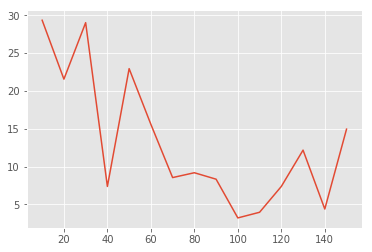

In [4]:
# Wpływ zwiększania populacji
avg_errs = []
values_used = []
for i in range(iterations_of_dependency_check):
    value_used = (i+1)*10
    values_used.append(value_used)
    avg_errs.append(
        AnalyseGEN("Algorytm genetyczny", [files[3]], [expected_results[3]], iterations=100, populationSize=value_used, drawPlot=False)[1])
print(avg_errs)

plt.plot(values_used, avg_errs)

starting TSP/data26
b'1119'
19.423692636072573
starting TSP/data26
b'1214'
29.562433297758805
starting TSP/data26
b'1015'
8.32443970117396
starting TSP/data26
b'1077'
14.941302027748133
starting TSP/data26
b'1140'
21.66488794023479
starting TSP/data26
b'1003'
7.043756670224119
starting TSP/data26
b'1054'
12.48665955176094
starting TSP/data26
b'1090'
16.328708644610458
starting TSP/data26
b'937'
0.0
starting TSP/data26
b'1145'
22.198505869797224
starting TSP/data26
b'995'
6.189967982924227
starting TSP/data26
b'1072'
14.4076840981857
starting TSP/data26
b'1066'
13.767342582710778
starting TSP/data26
b'1181'
26.040554962646745
starting TSP/data26
b'1006'
7.363927427961579
[19.423692636072573, 29.562433297758805, 8.32443970117396, 14.941302027748133, 21.66488794023479, 7.043756670224119, 12.48665955176094, 16.328708644610458, 0.0, 22.198505869797224, 6.189967982924227, 14.4076840981857, 13.767342582710778, 26.040554962646745, 7.363927427961579]


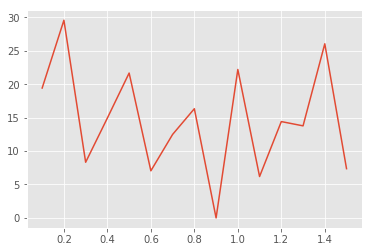

In [5]:
# Wpływ zwiększania prawdopodob. mutacji
avg_errs = []
values_used = []
for i in range(iterations_of_dependency_check):
    value_used = (i+1)*(0.05)
    values_used.append(value_used)
    avg_errs.append(
        AnalyseGEN("Algorytm genetyczny", [files[3]], [expected_results[3]], iterations=100, populationSize=50, mutationProbability=value_used, drawPlot=False)[1])
print(avg_errs)

plt.plot(values_used, avg_errs)

starting TSP/data26
b'1129'
20.490928495197437
starting TSP/data26
b'1220'
30.202774813233724
starting TSP/data26
b'1101'
17.502668089647813
starting TSP/data26
b'1256'
34.044823906083245
starting TSP/data26
b'1055'
12.593383137673426
starting TSP/data26
b'1106'
18.036286019210245
starting TSP/data26
b'1053'
12.379935965848453
starting TSP/data26
b'977'
4.268943436499466
starting TSP/data26
b'978'
4.375667022411953
starting TSP/data26
b'1004'
7.150480256136606
starting TSP/data26
b'1074'
14.621131270010673
starting TSP/data26
b'1026'
9.498399146211312
starting TSP/data26
b'1010'
7.790821771611527
starting TSP/data26
b'1016'
8.431163287086447
starting TSP/data26
b'1067'
13.874066168623267
[20.490928495197437, 30.202774813233724, 17.502668089647813, 34.044823906083245, 12.593383137673426, 18.036286019210245, 12.379935965848453, 4.268943436499466, 4.375667022411953, 7.150480256136606, 14.621131270010673, 9.498399146211312, 7.790821771611527, 8.431163287086447, 13.874066168623267]


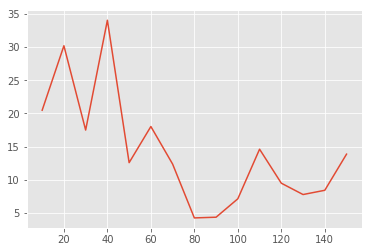

In [6]:
# Wpływ zwiększania ilości nowego potomstwa
avg_errs = []
values_used = []
for i in range(iterations_of_dependency_check):
    value_used = (i+1) * 10
    values_used.append(value_used)
    avg_errs.append(
        AnalyseGEN("Algorytm genetyczny", [files[3]], [expected_results[3]], iterations=100, populationSize=50, crossesPerGeneration=value_used, drawPlot=False)[1])
print(avg_errs)

plt.plot(values_used, avg_errs)

starting TSP/data17
b'2153'
starting TSP/data21
b'2801'
starting TSP/data24
b'1614'
starting TSP/data26
b'953'
starting TSP/data29
b'1669'
starting TSP/data42
b'1131'
starting TSP/data58
b'47640'
starting TSP/data120
b'25475'


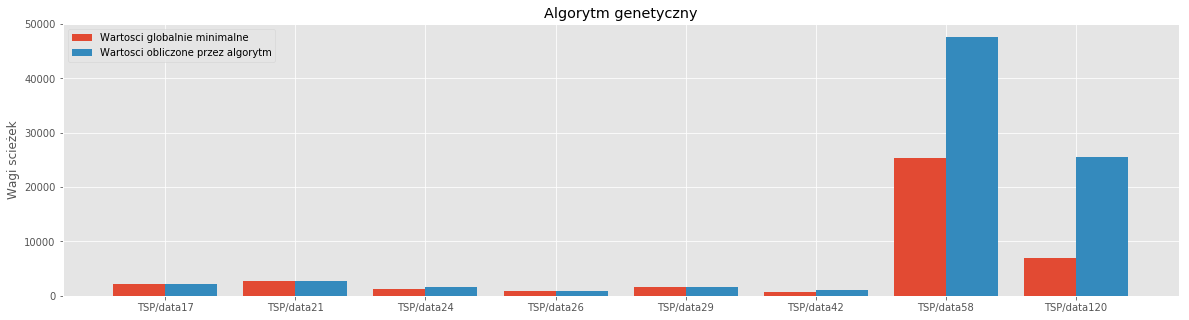

56.92007093304268


(      baseFile  actual_results  expected_results       error
 0   TSP/data17          2153.0              2085    3.261391
 1   TSP/data21          2801.0              2707    3.472479
 2   TSP/data24          1614.0              1272   26.886792
 3   TSP/data26           953.0               937    1.707577
 4   TSP/data29          1669.0              1610    3.664596
 5   TSP/data42          1131.0               699   61.802575
 6   TSP/data58         47640.0             25395   87.595983
 7  TSP/data120         25475.0              6942  266.969173,
 56.92007093304268)

In [7]:
display(AnalyseGEN("Algorytm genetyczny", files, expected_results, iterations=100, populationSize=100)[0])